In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# %% --------------------------------------- Load Packages -------------------------------------------------------------
import numpy as np
import os
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model
from skimage.transform import resize

In [3]:
import numpy as np
from sklearn.manifold import TSNE
import os
import random
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras import Model, Sequential
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Input, Reshape, Dense, Dropout, \
    Activation, LeakyReLU, Conv2D, Conv2DTranspose, Embedding, \
    Concatenate, multiply, Flatten, BatchNormalization
from tensorflow.keras.initializers import glorot_normal
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.manifold import TSNE
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, imagenet_utils
from tensorflow.keras.layers import Softmax
from sklearn.metrics import confusion_matrix

from sklearn.manifold import TSNE
from tensorflow.keras.models import load_model
import csv
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model
from skimage.transform import resize
import natsort
import math
import glob
import pandas as pd

In [4]:

os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco_scale/glyco/imbalanceGAN/RESULT/PRECISION/PROPOSE')
gen_path = '8_generator.h5'
generator = load_model(gen_path)


In [5]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1')
path = os.getcwd()
filelist = glob.glob(os.path.join(path, "*.csv"))
filelist=sorted(filelist)
a = 0
phase_1 = np.zeros((96,800))

for file in filelist:
  print(file)
  result = pd.read_csv(file,header=0)
  result = result.values[:,2]
  phase_1[a,:]=result
  a=a+1


os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum2')
path = os.getcwd()
filelist = glob.glob(os.path.join(path, "*.csv"))
filelist=sorted(filelist)
a = 0
phase_2 = np.zeros((96,800))

for file in filelist:
  print(file)
  result = pd.read_csv(file,header=0)
  result = result.values[:,2]
  phase_2[a,:]=result
  a=a+1

os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum3')
path = os.getcwd()
filelist = glob.glob(os.path.join(path, "*.csv"))
filelist=sorted(filelist)
a = 0
phase_3 = np.zeros((96,800))

for file in filelist:
  print(file)
  result = pd.read_csv(file,header=0)
  result = result.values[:,2]
  phase_3[a,:]=result
  a=a+1


#total: zero: 194 & one: 94
phase_zero=np.zeros((194,800))
phase_one=np.zeros((94,800))

j=0
for i in range(66):
  phase_zero[j,:]=phase_1[i,:]
  j=j+1
j=66
for i in range(64):
  phase_zero[j,:]=phase_2[i,:]
  j=j+1
j=130
for i in  range(64):
  phase_zero[j,:]=phase_3[i,:]
  j=j+1

j=0
for i in range(66,96):
  phase_one[j,:]=phase_1[i,:]
  j=j+1
j=30
for i in range(64,96):
  phase_one[j,:]=phase_2[i,:]
  j=j+1
j=62
for i in range(64,96):
  phase_one[j,:]=phase_3[i,:]
  j=j+1


print(np.max(phase_zero))
print(np.max(phase_one))
print(np.min(phase_zero))
print(np.min(phase_one))

minimum=np.min(phase_one)
maximum=np.max(phase_zero)



phase_zero_scale= (phase_zero-((maximum+minimum)/2))/((maximum-minimum)/2)
phase_one_scale= (phase_one-((maximum+minimum)/2))/((maximum-minimum)/2)


ring_crop_up=np.zeros((194,28,28,1))
line_crop_up=np.zeros((94,28,28,1))


for i in range(194):
  ring_crop_up[i,:,:,:]=np.reshape(phase_zero_scale[i,0:784], (28,28,1))
for i in range(94):
  line_crop_up[i,:,:,:]=np.reshape(phase_one_scale[i,0:784], (28,28,1))


def change_image_shape(images):
    shape_tuple = images.shape
    if len(shape_tuple) == 3:
        images = images.reshape(-1, shape_tuple[-1], shape_tuple[-1], 1)
    elif shape_tuple == 4 and shape_tuple[-1] > 3:
        images = images.reshape(-1, shape_tuple[-1], shape_tuple[-1], shape_tuple[1])
    return images



ring_crop = ring_crop_up
line_crop = line_crop_up



print(ring_crop.shape)
print(line_crop.shape)




normal_image = ring_crop
fan_image = line_crop


number=8
np.random.seed(number*100)
np.random.shuffle(normal_image)
np.random.shuffle(fan_image)



a = 120
b = 10


batch_number = 30
class_number = 30

iter_number = int(np.ceil((a+b)/batch_number))

normal = normal_image[0:a,:,:,:]
fan = fan_image[0:b,:,:,:]


normal_test = normal_image[a:,:,:,:]
fan_test = fan_image[b:,:,:,:]


images =  np.concatenate((normal,fan),axis=0)
normal_label = np.zeros(normal.shape[0])
fan_label = np.ones(fan.shape[0])
labels =np.concatenate((normal_label,fan_label),axis=0)


images_test =  np.concatenate((normal_test,fan_test),axis=0)
normal_test_label = np.zeros(normal_test.shape[0])
fan_test_label = np.ones(fan_test.shape[0])
labels_test =np.concatenate((normal_test_label,fan_test_label),axis=0)

images = change_image_shape(images)
images_test = change_image_shape(images_test)


channel = images.shape[-1]

real = np.ndarray(shape=(images.shape[0], 64, 64, channel))
for i in range(images.shape[0]):
    real[i] = cv2.resize(images[i], (64, 64)).reshape((64, 64, channel))


# to 64 x 64 x channel
real_test = np.ndarray(shape=(images_test.shape[0], 64, 64, channel))
for i in range(images_test.shape[0]):
    real_test[i] = cv2.resize(images_test[i], (64, 64)).reshape((64, 64, channel))

x_train, x_test, y_train, y_test = train_test_split(real, labels, test_size=0.01, shuffle=True, random_state=42)
x_test, x_valid, y_test, y_valid = train_test_split(real_test, labels_test, test_size=0.01, shuffle=True, random_state=42)


img_size = x_train[0].shape
n_classes = len(np.unique(y_train))


/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_1.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_10.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_11.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_12.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_13.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_14.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_15.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_16.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_17.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_18.csv
/

In [6]:
latent_dim=128

In [7]:
zero=x_test[y_test==0]

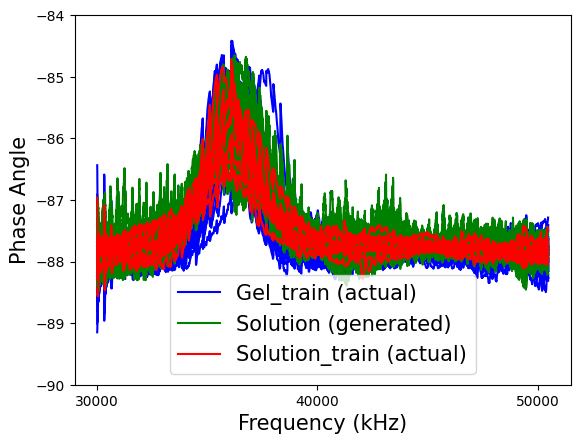

In [8]:
zero=x_train[y_train==0]
for i in range(zero.shape[0]):
  c=zero[i,:,:,:]
  d=np.reshape(c,(4096,1))
  e=(d*((maximum-minimum)/2))+((maximum+minimum)/2)
  plt.plot(e,color='blue')
  plt.ylim(-90,-84)


plt.plot(e,color='blue',label='Gel_train (actual)')

random_latent_vectors = tf.random.normal(shape=(30, 128))
decoded_imgs = generator([random_latent_vectors, np.ones(30)*1],training=True)
a=tf.reshape(decoded_imgs,(30,64*64,1,1))
b=a.numpy()
for i in range(30):
  c=b[i,:,:,:]
  d=np.reshape(c,(4096,1))
  e=(d*((maximum-minimum)/2))+((maximum+minimum)/2)
  plt.plot(e,color='green')
plt.plot(e,color='green',label='Solution (generated)')


zero=x_train[y_train==1]
for i in range(zero.shape[0]):
  c=zero[i,:,:,:]
  d=np.reshape(c,(4096,1))
  e=(d*((maximum-minimum)/2))+((maximum+minimum)/2)
  plt.plot(e,color='red')
  plt.ylim(-90,-84)
plt.plot(e,color='red',label='Solution_train (actual)')

plt.xlabel('Frequency (kHz)',fontsize="15")
plt.xticks([0,2000,4000], [30000,40000,50000])
plt.ylabel('Phase Angle',fontsize="15")
plt.legend(fontsize="15")
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'glyco_a.eps'
os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco_scale/glyco/imbalanceGAN/CODE/eps')
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()

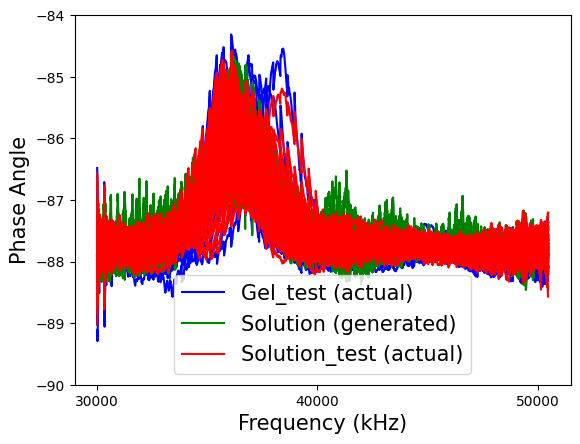

In [9]:
zero=x_test[y_test==0]
for i in range(zero.shape[0]):
  c=zero[i,:,:,:]
  d=np.reshape(c,(4096,1))
  e=(d*((maximum-minimum)/2))+((maximum+minimum)/2)
  plt.plot(e,color='blue')
  plt.ylim(-90,-84)

plt.plot(e,color='blue',label='Gel_test (actual)')


random_latent_vectors = tf.random.normal(shape=(30, 128))
decoded_imgs = generator([random_latent_vectors, np.ones(30)*1],training=True)
a=tf.reshape(decoded_imgs,(30,64*64,1,1))
b=a.numpy()
for i in range(30):
  c=b[i,:,:,:]
  d=np.reshape(c,(4096,1))
  e=(d*((maximum-minimum)/2))+((maximum+minimum)/2)
  plt.plot(e,color='green')
plt.plot(e,color='green',label='Solution (generated)')

zero=x_test[y_test==1]
for i in range(zero.shape[0]):
  c=zero[i,:,:,:]
  d=np.reshape(c,(4096,1))
  e=(d*((maximum-minimum)/2))+((maximum+minimum)/2)
  plt.plot(e,color='red')
  plt.ylim(-90,-84)
plt.plot(e,color='red',label='Solution_test (actual)')

plt.xlabel('Frequency (kHz)',fontsize="15")
plt.xticks([0,2000,4000], [30000,40000,50000])
plt.ylabel('Phase Angle',fontsize="15")
plt.legend(fontsize="15")
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'glyco_b.eps'
os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco_scale/glyco/imbalanceGAN/CODE/eps')
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()

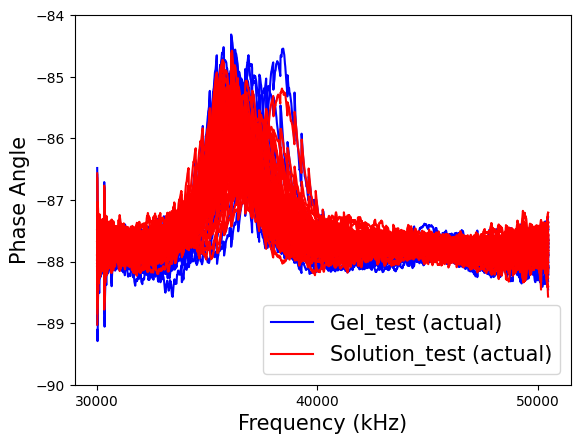

In [10]:
zero=x_test[y_test==0]
for i in range(zero.shape[0]):
  c=zero[i,:,:,:]
  d=np.reshape(c,(4096,1))
  e=(d*((maximum-minimum)/2))+((maximum+minimum)/2)
  plt.plot(e,color='blue')
  plt.ylim(-90,-84)

plt.plot(e,color='blue',label='Gel_test (actual)')


# random_latent_vectors = tf.random.normal(shape=(30, 128))
# decoded_imgs = generator([random_latent_vectors, np.ones(30)*1],training=True)
# a=tf.reshape(decoded_imgs,(30,64*64,1,1))
# b=a.numpy()
# for i in range(30):
#   c=b[i,:,:,:]
#   d=np.reshape(c,(4096,1))
#   e=(d*((maximum-minimum)/2))+((maximum+minimum)/2)
#   plt.plot(e,color='green')
# plt.plot(e,color='green',label='Solution (generated)')

zero=x_test[y_test==1]
for i in range(zero.shape[0]):
  c=zero[i,:,:,:]
  d=np.reshape(c,(4096,1))
  e=(d*((maximum-minimum)/2))+((maximum+minimum)/2)
  plt.plot(e,color='red')
  plt.ylim(-90,-84)
plt.plot(e,color='red',label='Solution_test (actual)')

plt.xlabel('Frequency (kHz)',fontsize="15")
plt.xticks([0,2000,4000], [30000,40000,50000])
plt.ylabel('Phase Angle',fontsize="15")
plt.legend(fontsize="15")
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'glyco_b.eps'
os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco_scale/glyco/imbalanceGAN/CODE/eps')
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()